# UTILIZAÇÃO ELEMENTAR DA BIBLIOTECA

A função mais elementar desta biblioteca de módulos `python` é a computação de perfis transversais de feixes ópticos.

Dado que máquinas são incapazes de computar abstrações matemáticas como um feixe óptico, podemos computá-los apenas em discretizações de estratos finitos do plano transverso à propagação (assumida $z$ na maioria dos casos).

Para computarmos o perfil transversal em $z = 0$ iremos primeiramente computar a região do plano transverso em que serão feitas nossas análises.

In [1]:
# módulo numpy: utilizado na computação de matrizes
import numpy as np

# construção da região simulada do plano transverso
x = np.linspace(-40.0, +40.0, 500); # 500 pontos entre -40 e +40
y = np.linspace(-40.0, +40.0, 500); # 500 pontos entre -40 e +40

X, Y = np.meshgrid(x, y);           # malha de pontos do plano transverso

agora, para computarmos os feixes ópticos, importaremos o módulo `optical.beam` em `../../`

In [2]:
%cd -q ../../
from optical import beam

## Construção de um feixe óptico genérico

Feixes ópticos são computados pelo construtor `optical.beam.crate()` como uma matriz bidimensional (`numpy.ndarray`) de entradas complexas (`numpy.complex128`).

> `optical.beam.create(F, (X,Y))`
>
>> computa o feixe de envoltória `F(x,y)` nos pontos de `(X, Y)`.
>
> parâmetros opcionais:
>
>> `center` = `(x0,y0)`
>>
>> par de coordenadas do espaço onde o feixe está centrado.
>
>> `phase`
>>
>> valor ou matriz bidimensional de valores da fase ao longo de `region`.
>
>> `incidence` = `optical.beam.incidence(k, beam_angulation = (phi_x, phi_y))`
>>
>> vetor de onda de incidência do campo com respeito ao plano transverso de propagação.
>
>> `coordinate_system`
>>
>> `beam.coordinate_system.polar` caso `F` é descrito em coordenadas polares
>

caso seja necessário normalizar a intensidade do campo, podemos utilizar a função `optical.beam.normalize`.

In [64]:
# exemplo de criação de feixe óptico
feixe = beam.normalize(
    beam.create(
        F = lambda r, theta: 100.0 * np.exp(
            -r ** 2 / 20.0 ** 2
        ) * np.exp(np.sin(r * np.cos(theta)) * np.sin(r * np.sin(theta))),
        region = (X, Y),
        beam_center = (-25, 5),
        beam_phase = np.pi * (X ** 2 + Y ** 2) * np.cos(np.arctan2(X, Y)),
        incidence = beam.incidence(
            k = 1.0,
            beam_angulation = (0.0, 45.0)
        ),
        coordinate_system = beam.coordinate_system.polar
    )
);

### Perfil transversal do feixe óptico

Dado que a envoltória do feixe é complexa, algumas propriedades são inerentemente importantes para compreendê-lo (intensidade $|U|^2$ e fase $\operatorname{arg}(U)$).

In [4]:
# módulo plotly: utilizado na construção de gráficos
from plotly import graph_objects as go

layout = lambda titulo: go.Layout(
    title = titulo,
    title_x = 0.5,                  # centraliza o título
    xaxis = dict(title = 'x(μm)'),
    yaxis = dict(title = 'y(μm)'),
    width = 900,
    height = 850
);

cmap = {
    'intensidade': 'inferno',
    'fase': 'greys'
};

#### Intensidade

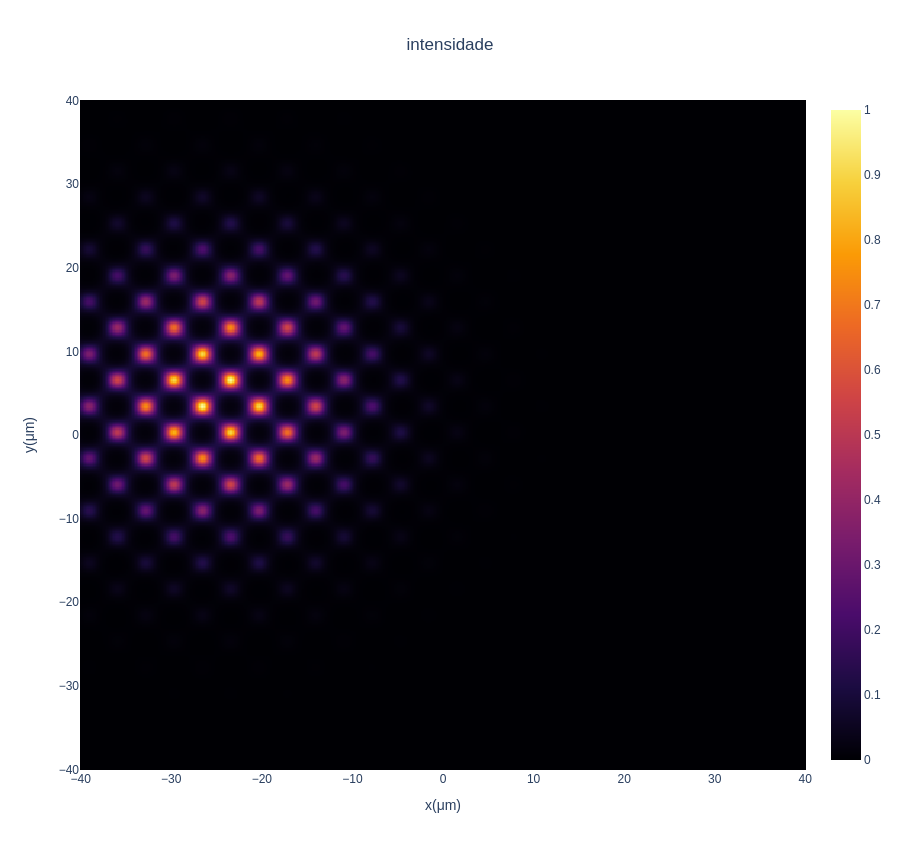

In [65]:
# criação do gráfico de intensidade do feixe
grafico_da_intensidade = go.Figure(
    go.Heatmap(
        x = x, y = y, z = np.abs(feixe) ** 2,
        colorscale = cmap['intensidade']
    ),
    layout = layout(titulo = 'intensidade')
);

grafico_da_intensidade.show("png"); # mostrar o gráfico em formato png

#### Fase

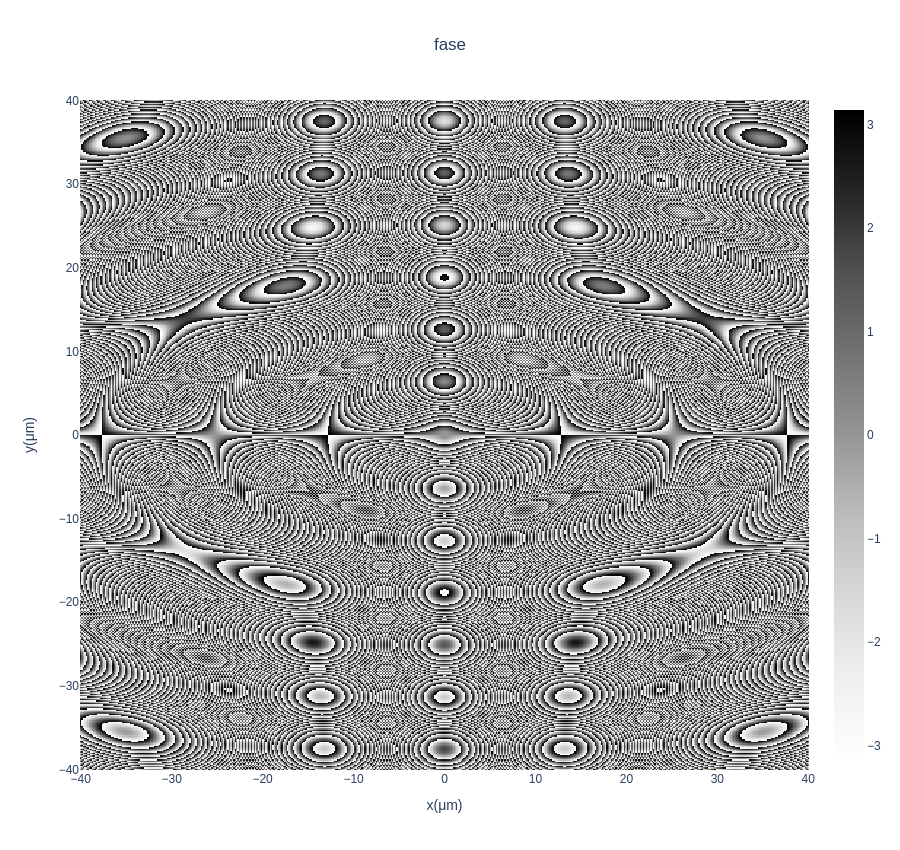

In [66]:
# criação do gráfico de fase do feixe
grafico_da_fase = go.Figure(
    go.Heatmap(
        x = x, y = y, z = np.angle(feixe),
        colorscale = cmap['fase']
    ),
    layout = layout(titulo = 'fase')
);

grafico_da_fase.show("png");        # mostrar o gráfico em formato png